<a href="https://colab.research.google.com/github/webanetStorm/AI_webanet/blob/master/71_%D0%AF%D1%81%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D1%82%D0%B5%D0%BC%D0%B0_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ознакомительная практика. Тема D. 71_Яскевич

В каждом задании обязательно использование модуля, которому посвящено задание

### ЗАДАНИЕ D1. Модули PICKLE и DATETIME


Выполняется на основе выполненного задания третьей темы. 1) Необходимо создать текстовый файл и реализовать функцию логирования (без использования модуля logging). Функция должна вызываться из каждого метода ранее реализованных классов и записывать в файл строки следующего содержания: КЛЮЧ --- ДАТА И ВРЕМЯ --- КОММЕНТАРИЙ. Ключи: CRE (создание экземпляра класса), INF (изменение), ERR (сработало исключение). Комментарий: создано …, удален …, добавлен …, распечатан … 2) Создать заполненные экземпляры реализованных класса, сериализовать их. В другом питоновском файле импортировать файл с описанием класса и десериализовать объекты. Применить к десериализованным объектам различные методы.


In [83]:
import datetime
import pickle


def log(action_key, comment):
    with open('logs.txt', 'a') as file:
        current_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        file.write(f'{action_key} --- {current_time} --- {comment}\n')


class Person:

    def __init__(self, first_name, last_name, age):
        if not isinstance(age, int) or age < 0:
            raise ValueError('Некорректный возраст')

        self.first_name = first_name
        self.last_name = last_name
        self.age = age

class Student(Person):

    def __init__(self, first_name, last_name, age, group):
        self.group = group
        super().__init__(first_name, last_name, age)
        self.diary = {}
        log('CRE', f'Создан {self}')

    def add_mark(self, subject, date, mark):
        try:
            if not 2 <= mark <= 5:
                raise ValueError('Некорректная оценка')
            if subject not in self.diary:
                self.diary[subject] = {}
            self.diary[subject][date] = mark
            log('INF', f'Добавлена оценка: {mark} по предмету {subject} для {self.first_name} {self.last_name}')
        except ValueError as e:
            log('ERR', f'Ошибка при добавлении оценки: {e}')

    def get_marks(self, subject):
        try:
            if subject not in self.diary:
                raise ValueError('Предмет в дневнике не найден')
            return self.diary[subject]
        except ValueError as e:
            log('ERR', f'Ошибка при получении оценок: {e}')

    def print_diary(self):
        for subject, marks in self.diary.items():
            print(f'{subject}:')
            for date, mark in marks.items():
                print(f'\t{date}: {mark}')

    def __str__(self):
        return f'{self.first_name} {self.last_name}, возраст: {self.age}, класс: {self.group}'


class Teacher(Person):

    def __init__(self, first_name, last_name, age, office_number):
        Person.__init__(self, first_name, last_name, age)
        self.office_number = office_number
        self.subjects = {}
        log('CRE', f'Создан {self}')

    def __str__(self):
        return f'{self.first_name} {self.last_name}, возраст: {self.age}'

    def __init__(self, first_name, last_name, age, office_number):
        Person.__init__(self, first_name, last_name, age)
        self.office_number = office_number
        self.subjects = {}
        log('CRE', f'Создан {self}')

    def change_office(self, new_office_number):
        self.office_number = new_office_number
        log('INF', f'Изменен кабинет у {self.first_name} {self.last_name} на {new_office_number}')

    def add_subject(self, group, subject):
        if group not in self.subjects:
            self.subjects[group] = []
        if subject not in self.subjects[group]:
            self.subjects[group].append(subject)
            log('INF', f'Добавлен предмет {subject} для группы {group}')

    def remove_subject(self, group, subject):
        if group in self.subjects and subject in self.subjects[group]:
            self.subjects[group].remove(subject)
            log('INF', f'Удален предмет {subject} из группы {group}')


class Class:
    def __init__(self, class_number, students_list, class_teacher):
        self.class_number = class_number
        self.students = students_list
        self.class_teacher = class_teacher
        log('CRE', f'Создан {self}')

    def __str__(self):
        class_info = f'Класс: {self.class_number}\n'
        class_info += f'Классный руководитель: {str(self.class_teacher)}\n'
        class_info += 'Ученики:\n'
        for student in self.students:
            class_info += f'{str(student)}\n'
        return class_info

    def __len__(self):
        return len(self.students)

    def __getitem__(self, index):
        if index == 0:
            return self.class_teacher
        elif 1 <= index <= len(self.students):
            return self.students[index - 1]
        else:
            raise IndexError('Выход за пределы списка')

    def __setitem__(self, index, value):
        if index == 0:
            self.class_teacher = value
        elif 1 <= index <= len(self.students):
            self.students[index - 1] = value
        else:
            raise IndexError('Выход за пределы списка')

    def __delitem__(self, index):
        if 1 <= index <= len(self.students):
            del self.students[index - 1]

    def __add__(self, student):
        self.students.append(student)
        return self

    def __sub__(self, student):
        self.students.remove(student)
        return self

    def save_to_file(self, filename):
        with open(filename, 'w') as file:
            file.write(str(self))
            for student in self.students:
                file.write(f'Дневник {student.first_name} {student.last_name}:\n')
                for subject, marks in student.diary.items():
                    file.write(f'{subject}:\n')
                    for date, mark in marks.items():
                        file.write(f'\t{date}: {mark}\n')


student1 = Student('Иван', 'Иванов', 16, '10Б')
student2 = Student('Антон', 'Антонов', 15, '8Б')
student3 = Student('Сергей', 'Сергеев', 15, '8Б')
teacher1 = Teacher('Мария', 'Петрова', 40, '102')
teacher2 = Teacher('Анна', 'Сергеевна', 35, '101')
class_group1 = Class('10Б', [student1], teacher1)
class_group2 = Class('8Б', [student2, student3], teacher2)
student1.add_mark('Математика', '2024-04-15', 5)
student2.add_mark('Информатика', '2024-04-14', 4)

try:
    student1.add_mark('Математика', '2024-04-15', 7)
except ValueError as e:
    print(f'Произошла ошибка: {e}')

teacher1.change_office('103')

### ЗАДАНИЕ D2. Модуль MATH


Реализовать функцию, вычисляющую математическую формулу. Параметры формулы являются аргументами функций. 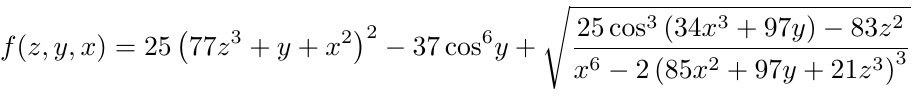


In [17]:
from cmath import cos, sqrt


def func(x, y, z):
    if x == 0:
        raise ZeroDivisionError('Ошибка (деление на ноль)')

    return 25 * (77 * z ** 3 + y + x ** 2) ** 2 - 37 * cos(y) ** 6 + sqrt((25 * cos(34 * x ** 3 + 97 * y) ** 3 - 83 * z ** 2) / x ** 6 - 2 * (85 * x ** 2 + 97 * y + 21 * z ** 3) ** 3)

Тестирование:

In [18]:
for x in range(4):
    for y in range(1, 4):
        for z in range(1, 4):
            try:
                print(f'f({x}, {y}, {z}) =', func(x, y, z))
            except ZeroDivisionError as e:
                print(f'f({x}, {y}, {z}) -', e)

f(0, 1, 1) - Ошибка (деление на ноль)
f(0, 1, 2) - Ошибка (деление на ноль)
f(0, 1, 3) - Ошибка (деление на ноль)
f(0, 2, 1) - Ошибка (деление на ноль)
f(0, 2, 2) - Ошибка (деление на ноль)
f(0, 2, 3) - Ошибка (деление на ноль)
f(0, 3, 1) - Ошибка (деление на ноль)
f(0, 3, 2) - Ошибка (деление на ноль)
f(0, 3, 3) - Ошибка (деление на ноль)
f(1, 1, 1) = (156024.07950242216+4090.3461974800025j)
f(1, 1, 2) = (9548099.079502422+9260.14724587245j)
f(1, 1, 3) = (108264024.07950242+28989.31251367026j)
f(1, 2, 1) = (159999.8078318941+7348.474897130003j)
f(1, 2, 2) = (9579024.807831895+13365.237682650833j)
f(1, 2, 3) = (108368099.8078319+34799.313489115695j)
f(1, 3, 1) = (163990.1668185583+11186.671939933763j)
f(1, 3, 2) = (9609965.16681856+17943.76493637j)
f(1, 3, 3) = (108472190.16681856+40952.708837043996j)
f(2, 1, 1) = (168099.07950242216+13861.595337401573j)
f(2, 1, 2) = (9641024.079502422+21044.957951692326j)
f(2, 1, 3) = (108576399.07950242+44989.95598656297j)
f(2, 2, 1) = (172224.807831

### ЗАДАНИЕ D3. Модуль RE


Количество слов. Слово — это последовательность из букв (русских или английских), внутри которой могут быть дефисы. На вход даётся текст, посчитайте, сколько в нём слов.  Примеры: Он --- серо-буро-малиновый!!  -> 2


In [20]:
from re import compile, findall


def count_words(text):
    return len(findall(compile(r'\b[а-яА-Яa-zA-Z]+(?:-[а-яА-Яa-zA-Z]+)*\b'), text))

Тестирование:

In [24]:
import traceback


try:
    assert count_words('Он --- серо-буро-малиновый!!') == 2
    assert count_words('qwerty - sdfsdf-dfsdf     fgkkk ss') == 4
    assert count_words('- - sdf, : dfdfdf') == 2
    assert count_words('1sdf3 kk . ва') == 2
except AssertionError:
    print('TEST ERROR - ОШИБКА В ТЕСТЕ')
    traceback.print_exc()
else:
    print('TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ')

TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ


### ЗАДАНИЕ D4. Различные модули для работы с платформой и операционной системой


Вручную собрать в папке «OP» файлы формата «task_A1.py» – все ранее решенные задачи из тем A, B. Написать функцию, которая автоматически распределит файлы по двум подпапкам («тема A», «тема B»).  Написать функцию, которая получает адрес папки «OP» и выполнит обход всех подпапок и: o	чтение всех «task_****.py» файлов, нахождение в тексте названия функции и параметров o	программный запуск и выполнение данных файлов, подсчет времени выполнения. Вывод функции в формате: 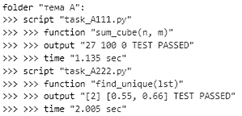


In [90]:
import subprocess
import shutil
import time
import os
import re


def func(path):
    folders = { 'A': os.path.join(path, 'A'),'B': os.path.join(path, 'B')}

    for file in os.listdir(path):
        if file.startswith('TASK_A') and file.endswith('.py'):
            shutil.move(os.path.join(path, file), os.path.join(folders['A'], file))
        elif file.startswith('TASK_B') and file.endswith('.py'):
            shutil.move(os.path.join(path, file), os.path.join(folders['B'], file))

    for theme, folder in folders.items():
        print(f'folder "{theme}":')
        for script in os.listdir(folder):
            start_time = time.time()
            script_path = os.path.join(folder, script)

            with open(script_path, 'r') as file:
                function_match = re.search(r'def (\w+)\(', file.read())

                if function_match:
                    function_name = function_match.group(1)
                else:
                    function_name = "No function found"

            try:
                result = subprocess.run(['python', script_path], capture_output=True, text=True)
                output = result.stdout.strip() or 'No output'
                error = result.stderr.strip()
            except Exception as e:
                output = 'Error'
                error = e

            print(f'>>> script "{script}"')
            print(f'>>> function "{function_name}()"')
            print(f'>>> output "{output}"')
            if error:
                print(f'>>> error "{error}"')
            print(f'>>> time "{time.time() - start_time} sec"')
            print()


func('OP')

folder "A":
>>> script "TASK_A5.py"
>>> function "display()"
>>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> time "0.049379587173461914 sec"

>>> script "TASK_A3.py"
>>> function "riders()"
>>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> time "0.0472261905670166 sec"

>>> script "TASK_A1.py"
>>> function "factorial()"
>>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> time "0.04605674743652344 sec"

>>> script "TASK_A2.py"
>>> function "int_diff()"
>>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> time "0.04583573341369629 sec"

>>> script "TASK_A4.py"
>>> function "isPrime()"
>>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> time "0.047481536865234375 sec"

folder "B":
>>> script "TASK_B1.py"
>>> function "duplicate_encode()"
>>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> time "0.04672050476074219 sec"

>>> script "TASK_B4.py"
>>> function "wiki_function()"
>>> output "1 place --- the --- 23 times
2 place --- town --- 9 times
3 place --- of --- 9 times
4 place --- is --- 7 times
5 place --- in --- 5 ti